In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(context='notebook', style='ticks', font_scale=1.5)
config = {
    "mathtext.fontset":'stix',
}

In [2]:
x = np.array([100, 1000, 10000, 100000, 1000000])

In [3]:
# get the results of the CGBP method
mcuts_list = []
times_list = []
for n in x:
    filelist = os.listdir(f'results/mc/n{n}_d3_gcn/')
    for f in filelist:
        if 'mcut' in f:
            mcuts = np.load(f'results/mc/n{n}_d3_gcn/{f}')
            mcuts_list.append(mcuts)
        elif 'time' in f:
            times = np.load(f'results/mc/n{n}_d3_gcn/{f}')
            times_list.append(times)

In [5]:
# get the results of the Greedy method
gfast_mcuts_list = []
gfast_times_list = []
for n in x[:-1]:
    gfast_mcuts_list.append(np.load(f'results/mc_greedy/n{n}_d3/mcut.npy'))
    gfast_times_list.append(np.load(f'results/mc_greedy/n{n}_d3/time.npy'))

In [4]:
mcut_mean = np.mean(mcuts_list, axis=1)
mcut_std = np.std(mcuts_list, axis=1)

In [6]:
gfast_mcut_mean = np.mean(gfast_mcuts_list, axis=1)
gfast_mcut_std = np.std(gfast_mcuts_list, axis=1)

In [7]:
# get the approximation ratios of CGBP and Greedy
P = 0.7632
ub = np.array([(3/4 + P * np.sqrt(3/4)) * n for n in x])
ratio_mean = mcut_mean / ub
ratio_std = mcut_std / ub
gfast_ratio_mean = gfast_mcut_mean / ub[:-1]
gfast_ratio_std = gfast_mcut_std / ub[:-1]

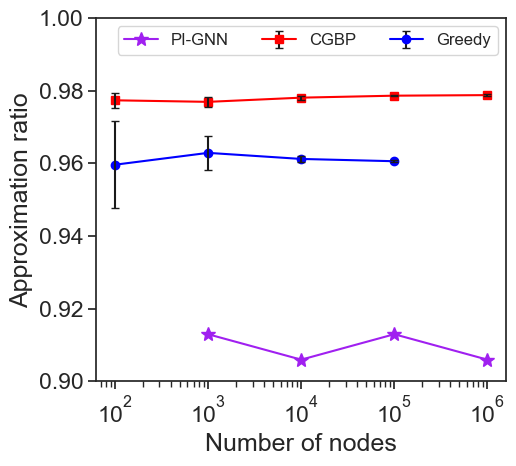

In [9]:
# plot approximation ratio vs n
red = '#FF0000'
purple = '#A020F0'
blue = '#0000FF'
fig, ax = plt.subplots(figsize=(5.5, 5))
ax.errorbar(x, ratio_mean, yerr=ratio_std, ecolor='k',capsize=3,capthick=1,fmt='s',color=red, label='CGBP',ls='-', barsabove=True)
ax.errorbar(x[:-1], gfast_ratio_mean, yerr=gfast_ratio_std, ecolor='k',capsize=3,capthick=1,fmt='o',color=blue, label='Greedy',ls='-', barsabove=True)
ax.plot(x[1:], [0.913, 0.906, 0.913, 0.906], c=purple, markersize=10, marker='*', label='PI-GNN',ls='-')
ax.legend(loc='best', fontsize=12, ncol=3)
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_xscale('log')
ax.set_ylim(0.9, 1.0)
plt.tight_layout()
plt.savefig('figs/mcut_ratio.png')

In [10]:
times_mean = np.mean(times_list, axis=1)
times_std = np.std(times_list, axis=1)

In [11]:
# get the time complexity
times_log = np.log10(times_mean)
slope, intercept = np.polyfit(np.log10(x[:-1]), times_log[:-1], 1)
print(slope, intercept)

0.009003226242998909 1.8272335822596888


In [13]:
slope2, intercept2 = np.polyfit(np.log10(x[-2:]), times_log[-2:], 1)
print(slope2, intercept2)

0.9250270786905989 -2.7488107280000187


In [12]:
gfast_times_mean = np.mean(gfast_times_list, axis=1)
gfast_times_std = np.std(gfast_times_list, axis=1)

In [14]:
gfast_times_log = np.log10(gfast_times_mean)
gfast_slope, gfast_intercept = np.polyfit(np.log10(x[:-1]), gfast_times_log, 1)
print(gfast_slope, gfast_intercept)

1.0443129807623592 -0.8878262658233316


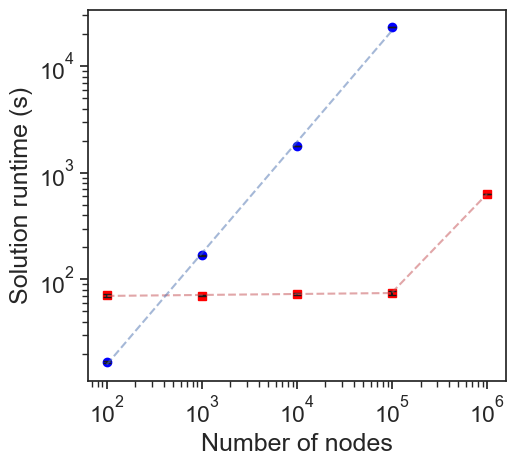

In [15]:
# plot runtime vs n
fig, ax = plt.subplots(figsize=(5.5, 5))
ax.errorbar(x, times_mean, yerr=times_std, ecolor='k',capsize=3,capthick=1,linestyle="none",barsabove=True,color=red, label='CGBP', marker='s')
ax.plot(x[:-1], x[:-1]**slope * 10**intercept, 'r--', alpha=.5)
ax.plot(x[-2:], x[-2:]**slope2 * 10**intercept2, 'r--', alpha=.5)
ax.errorbar(x[:-1], gfast_times_mean, yerr=gfast_times_std, ecolor='k',capsize=3,capthick=1,linestyle="none",barsabove=True,color=blue, label='Greedy', marker='o')
ax.plot(x[:-1], x[:-1]**gfast_slope * 10**gfast_intercept, 'b--', alpha=.5)
ax.set_ylabel('Solution runtime (s)')
ax.set_xlabel('Number of nodes')
ax.set_xscale('log')
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('figs/mcut_time.png')